# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [3]:
# Load the dataset
employee_raw = pd.read_csv('Employee_data.csv')

# Normalize garbled characters in text columns
text_cols = employee_raw.select_dtypes(include="object").columns
for c in text_cols:
    employee_raw[c] = (
        employee_raw[c]
        .astype(str)
        .str.replace("â€™", "'", regex=False)
        .str.strip()
    )

In [4]:
# Check the first few entries
employee_raw.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [5]:
# Inspect the shape of the dataset
employee_raw.shape

(74610, 24)

In [6]:
# Inspect the different columns in the dataset
employee_raw.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [7]:
# Check the summary of the dataset
employee_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

### **1.3 Check the data type of columns**

In [8]:
# Check the info to see the types of the feature variables and the null values present
employee_raw.dtypes

Employee ID                     int64
Age                             int64
Gender                         object
Years at Company                int64
Job Role                       object
Monthly Income                  int64
Work-Life Balance              object
Job Satisfaction               object
Performance Rating             object
Number of Promotions            int64
Overtime                       object
Distance from Home            float64
Education Level                object
Marital Status                 object
Number of Dependents            int64
Job Level                      object
Company Size                   object
Company Tenure (In Months)    float64
Remote Work                    object
Leadership Opportunities       object
Innovation Opportunities       object
Company Reputation             object
Employee Recognition           object
Attrition                      object
dtype: object

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [9]:
# Check the number of missing values in each column
missing_val_cols = employee_raw.isna().sum().sort_values(ascending=False)
missing_val_cols = missing_val_cols[missing_val_cols > 0]
missing_val_cols

Company Tenure (In Months)    2413
Distance from Home            1912
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [10]:
# Check the percentage of missing values in each column
missing_val_cols / employee_raw.shape[0] * 100

Company Tenure (In Months)    3.234151
Distance from Home            2.562659
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [11]:
# Handle the missing value rows in the column

employee_clean = employee_raw.copy()
for i in missing_val_cols.index:
    employee_clean[i] = employee_clean[i].fillna(employee_clean[i].mean())

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [12]:
# Check the percentage of remaining data after missing values are removed
employee_clean.isna().sum().sort_values(ascending=False) / employee_clean.shape[0] * 100

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [13]:
# Write a function to display the categorical columns with their unique values and check for redundant values

def show_categoricals(df: pd.DataFrame):
    """
    Display categorical columns with their unique values and check for redundant values
    (case-insensitive and whitespace-normalized).
    """
    # Identify categorical columns (object or category dtype)

    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

    
    if not cat_cols:
        print("No categorical columns found.")
        return
    
    for col in cat_cols:
        s = df[col]
        print("=" * 60)
        print(f"Column: {col}")
        print(f"Unique values: {s.nunique(dropna=False)}")
        print("\nValue counts:")
        print(s.value_counts(dropna=False))

In [14]:
# Check the data
show_categoricals(employee_clean)


Column: Gender
Unique values: 2

Value counts:
Gender
Male      40898
Female    33712
Name: count, dtype: int64
Column: Job Role
Unique values: 5

Value counts:
Job Role
Technology    19350
Healthcare    17107
Education     15679
Media         12011
Finance       10463
Name: count, dtype: int64
Column: Work-Life Balance
Unique values: 4

Value counts:
Work-Life Balance
Good         28196
Fair         22569
Excellent    13451
Poor         10394
Name: count, dtype: int64
Column: Job Satisfaction
Unique values: 4

Value counts:
Job Satisfaction
High         37306
Very High    15101
Medium       14738
Low           7465
Name: count, dtype: int64
Column: Performance Rating
Unique values: 4

Value counts:
Performance Rating
Average          44786
High             14938
Below Average    11150
Low               3736
Name: count, dtype: int64
Column: Overtime
Unique values: 2

Value counts:
Overtime
No     50230
Yes    24380
Name: count, dtype: int64
Column: Education Level
Unique values: 5

Va

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [15]:
# Drop redundant columns which are not required for modelling
employee_clean.drop(columns='Employee ID', inplace=True, errors='ignore')

In [16]:
# Check first few rows of data
employee_clean.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [17]:
# Import Train Test Split
from sklearn.model_selection import train_test_split


### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [18]:
# Put all the feature variables in X
_df = employee_clean.copy()
X = _df.drop(columns=["Attrition"])
# Put the target variable in y
y = _df["Attrition"]

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [19]:
# Split the data into 70% train data and 30% validation data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100, stratify=y
)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [20]:
# Select numerical columns
num_cols = X_train.select_dtypes(include=[np.number]).columns
num_cols

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

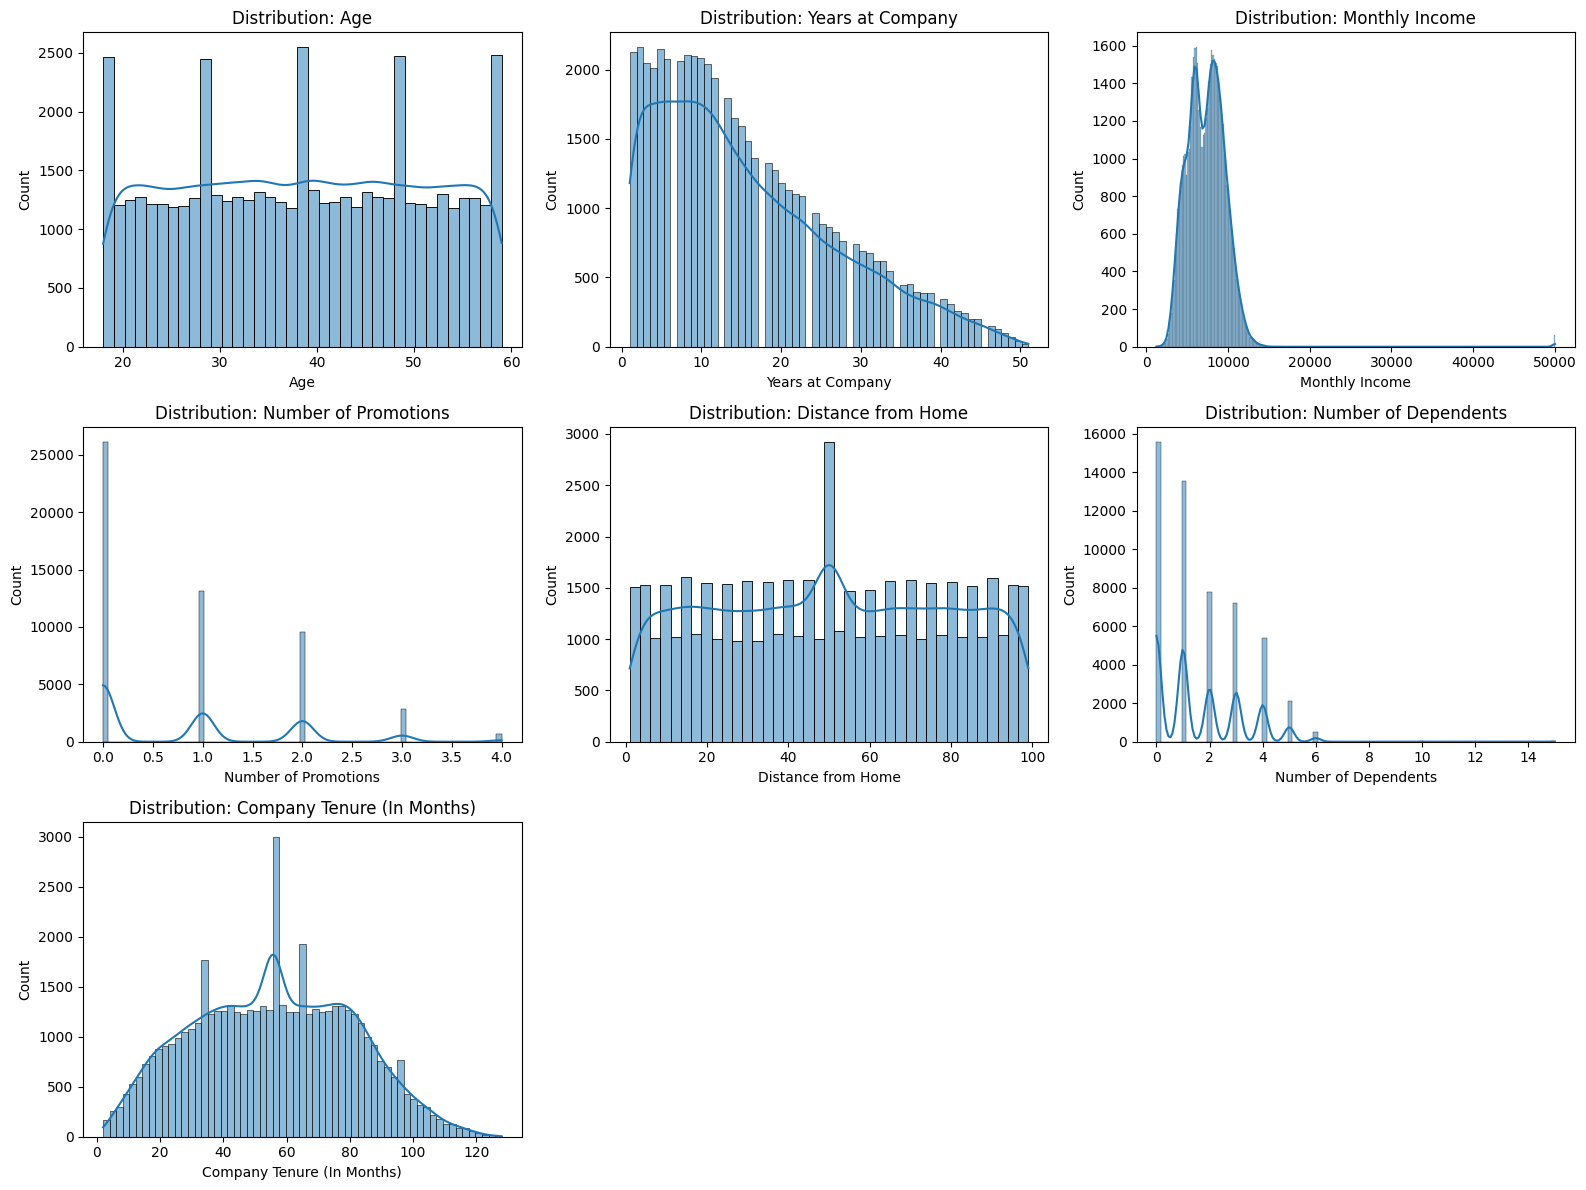

In [21]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

fig_rows = int(np.ceil(len(num_cols)/3))
fig, axes = plt.subplots(fig_rows, 3, figsize=(16, 4*fig_rows))
axes = np.array(axes).reshape(-1)
for i, c in enumerate(num_cols):
    sns.histplot(X_train[c], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution: {c}")
for j in range(i+1, len(axes)):
    axes[j].axis("off")
plt.tight_layout()
plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

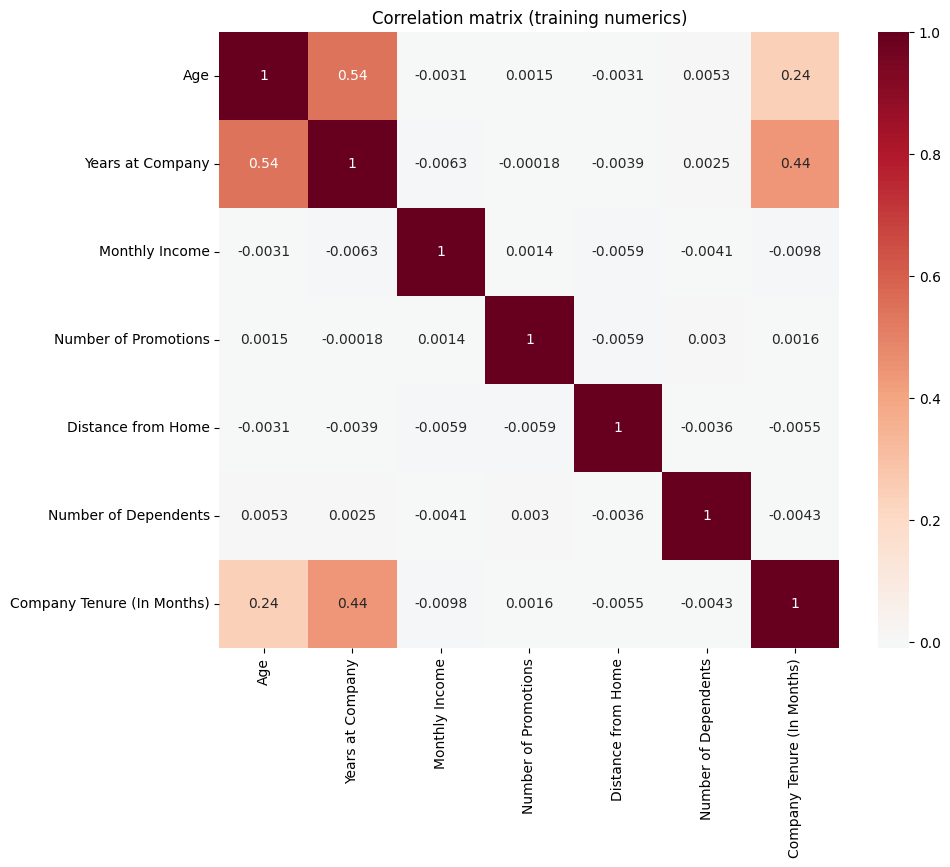

In [22]:
# Create correlation matrix for numerical columns
corr = X_train[num_cols].corr(numeric_only=True)

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="RdBu_r", annot=True, center=0)
plt.title("Correlation matrix (training numerics)")
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

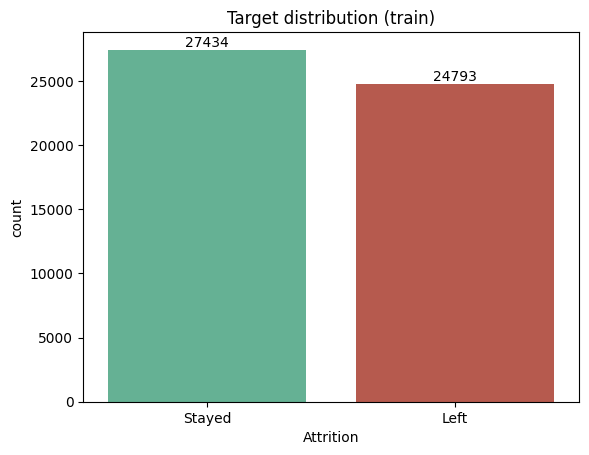

Attrition
Stayed    27434
Left      24793
Name: count, dtype: int64

In [23]:
# Plot a bar chart to check class balance
palette = {'Stayed': "#58BE97", 'Left': "#C74D3D"}
ax = sns.countplot(x=y_train, palette=palette)
ax.set_title("Target distribution (train)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

y_train.value_counts()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

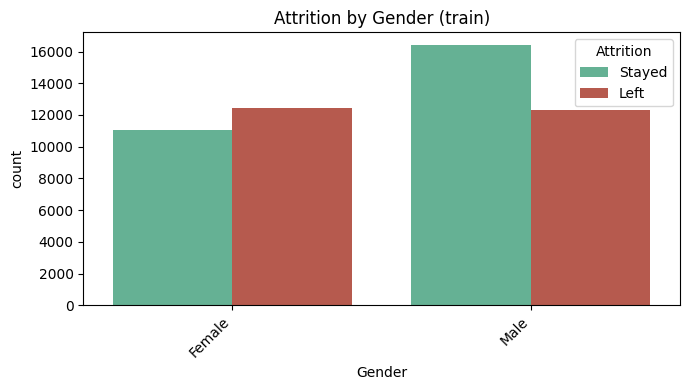

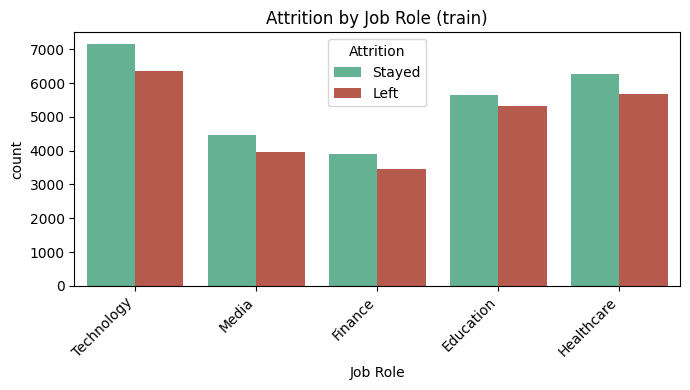

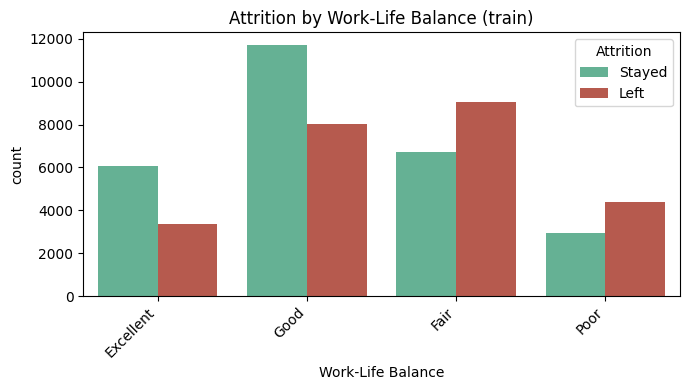

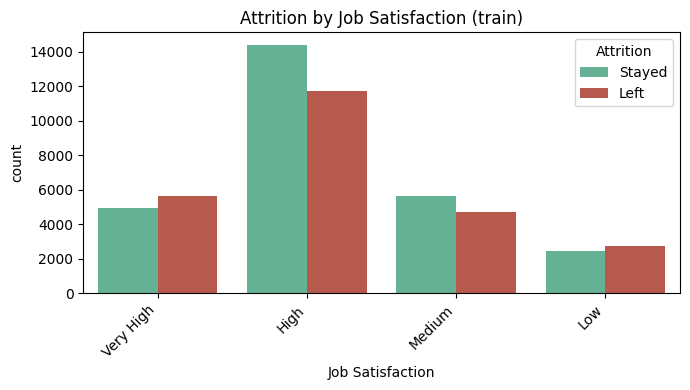

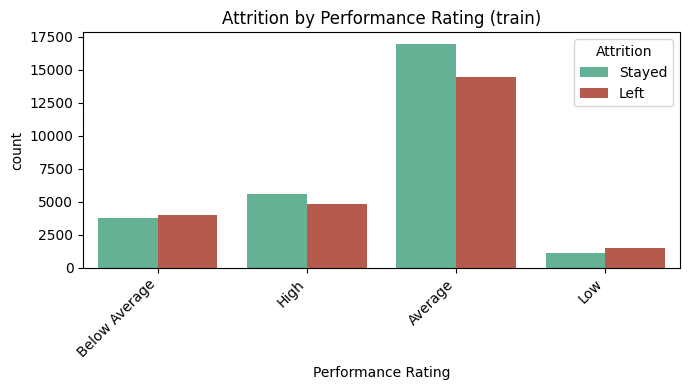

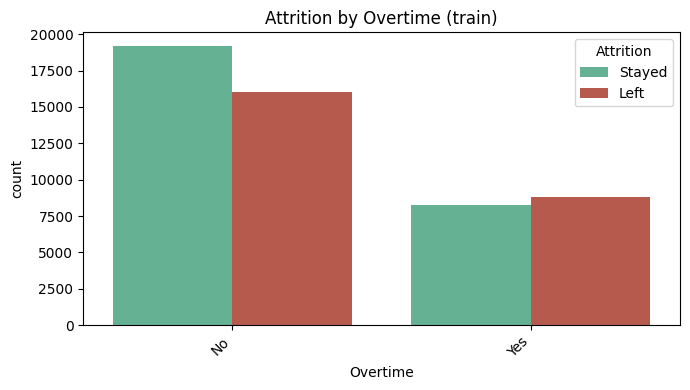

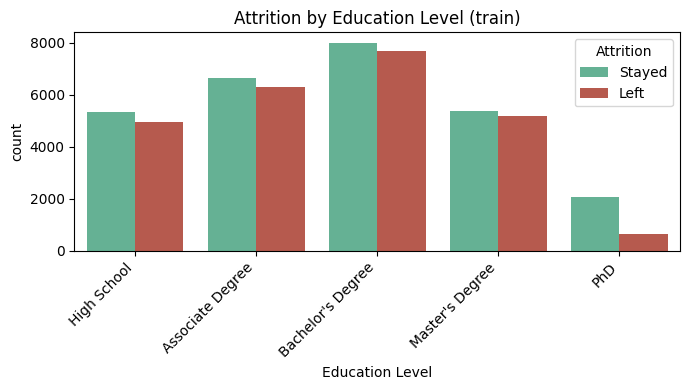

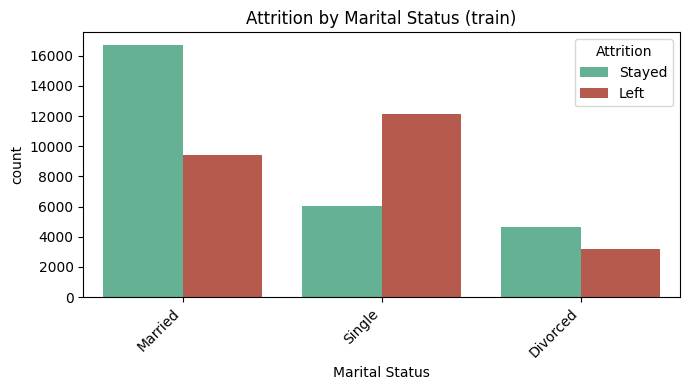

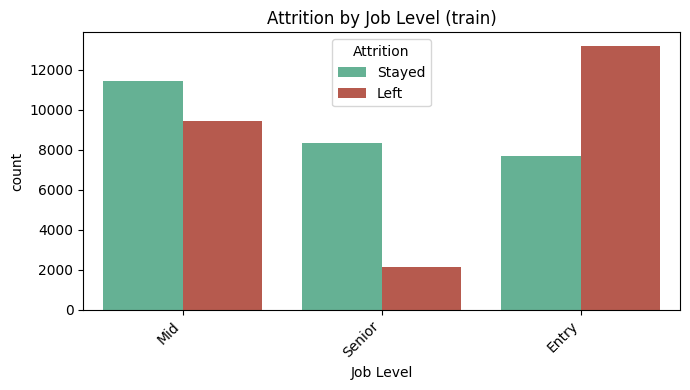

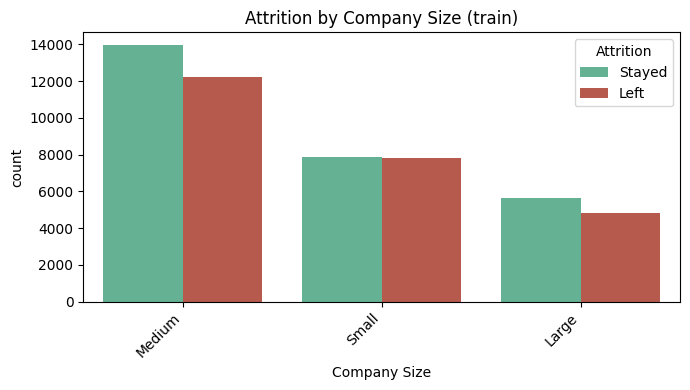

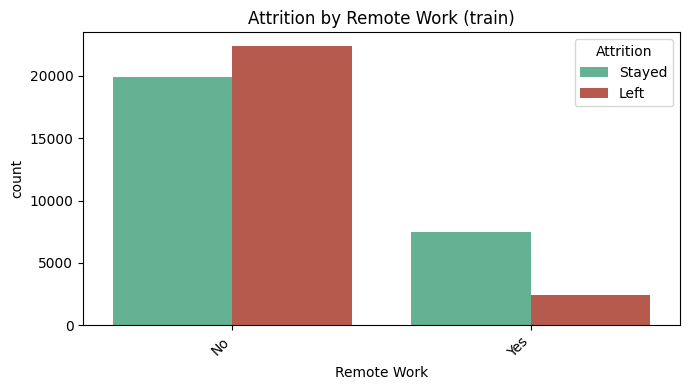

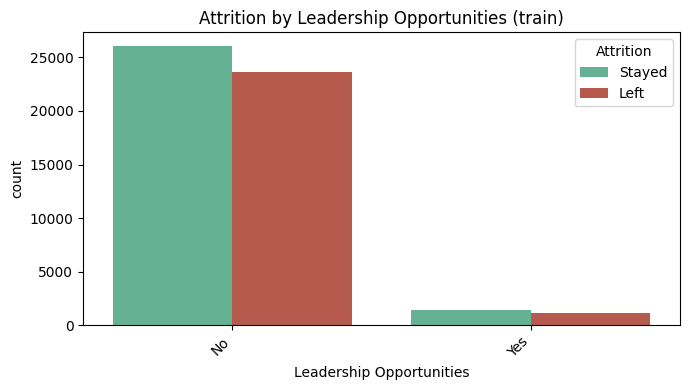

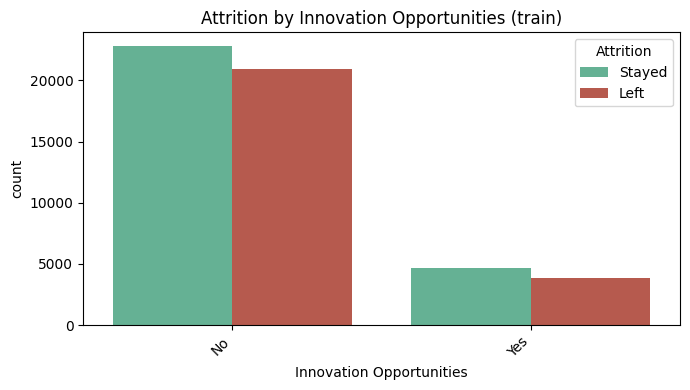

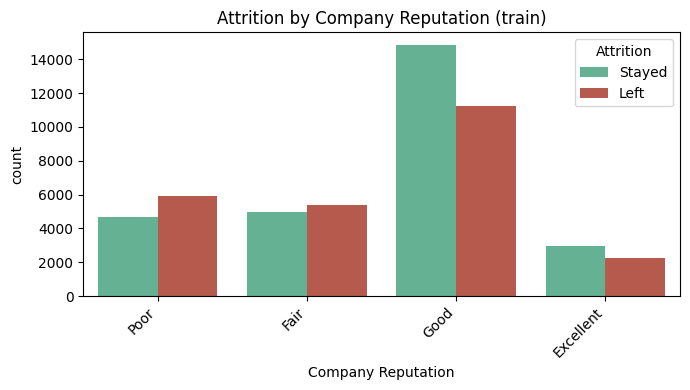

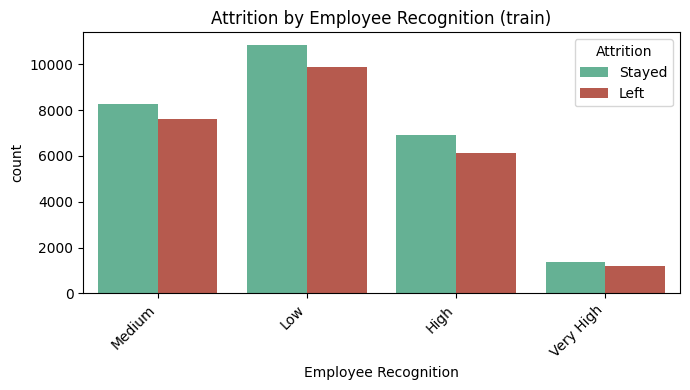

In [24]:
# Plot distribution for each categorical column with target variable
cat_cols_train = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
palette = {'Stayed': "#58BE97", 'Left': "#C74D3D"}

for c in cat_cols_train:
    plt.figure(figsize=(7,4))
    tmp = pd.concat([X_train[[c]].copy(), y_train.rename("Attrition")], axis=1)
    sns.countplot(data=tmp, x=c, hue="Attrition", palette=palette)
    plt.title(f"Attrition by {c} (train)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [25]:
# Select numerical columns
num_cols = X_test.select_dtypes(include=[np.number]).columns
num_cols

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

5.1.2 Plot distribution of numerical columns

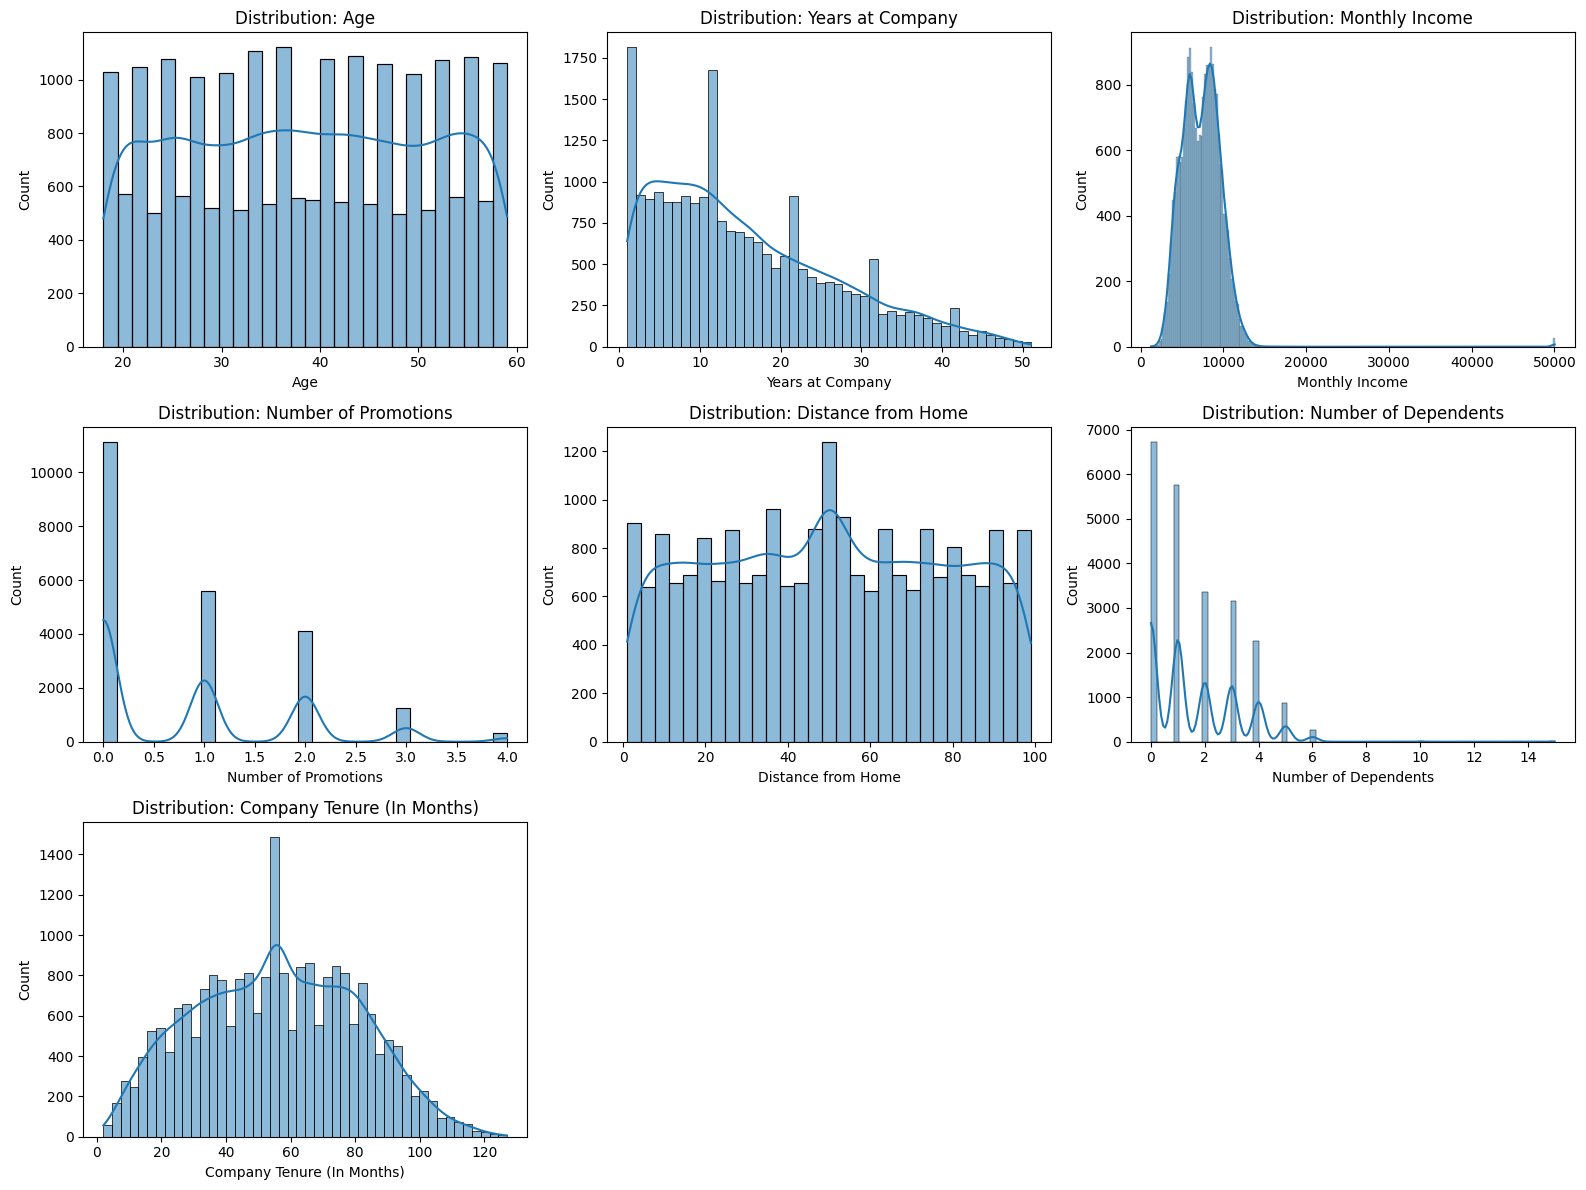

In [26]:
# Plot all the numerical columns to understand their distribution
fig_rows = int(np.ceil(len(num_cols)/3))
fig, axes = plt.subplots(fig_rows, 3, figsize=(16, 4*fig_rows))
axes = np.array(axes).reshape(-1)
for i, c in enumerate(num_cols):
    sns.histplot(X_test[c], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution: {c}")
for j in range(i+1, len(axes)):
    axes[j].axis("off")
plt.tight_layout()
plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

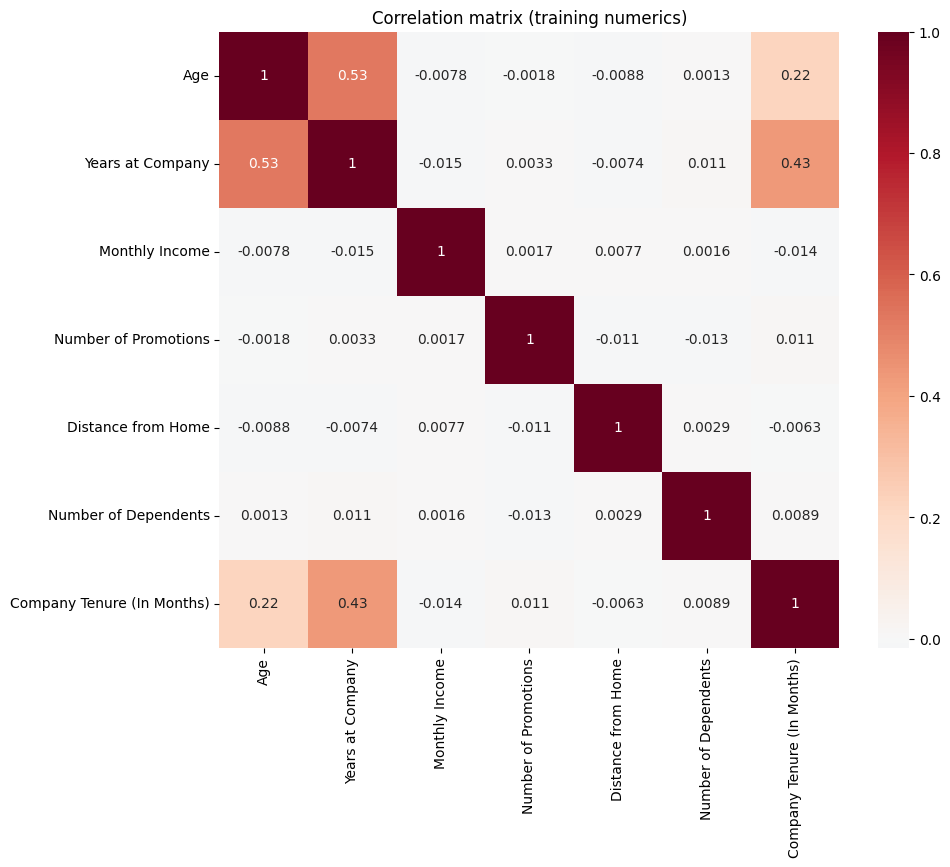

In [27]:
# Create correlation matrix for numerical columns
corr_test = X_test[num_cols].corr(numeric_only=True)

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_test, cmap="RdBu_r", annot=True, center=0)
plt.title("Correlation matrix (training numerics)")
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

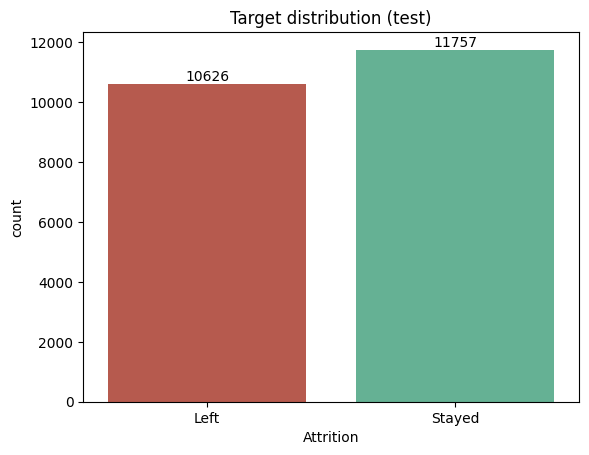

Attrition
Stayed    11757
Left      10626
Name: count, dtype: int64

In [28]:
# Plot a bar chart to check class balance
palette = {'Stayed': "#58BE97", 'Left': "#C74D3D"}
ax = sns.countplot(x=y_test, palette=palette, hue_order=["Stayed", "Left"])
ax.set_title("Target distribution (test)")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

y_test.value_counts()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

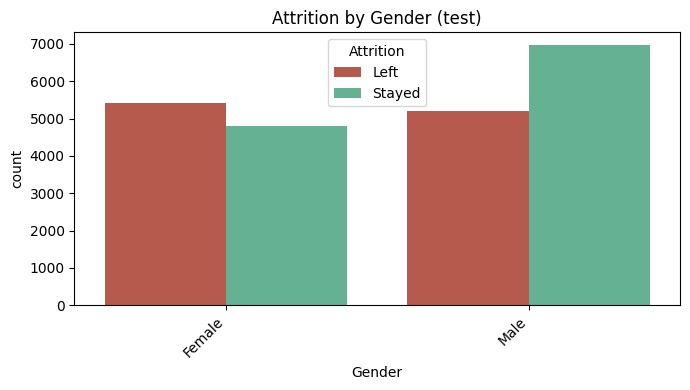

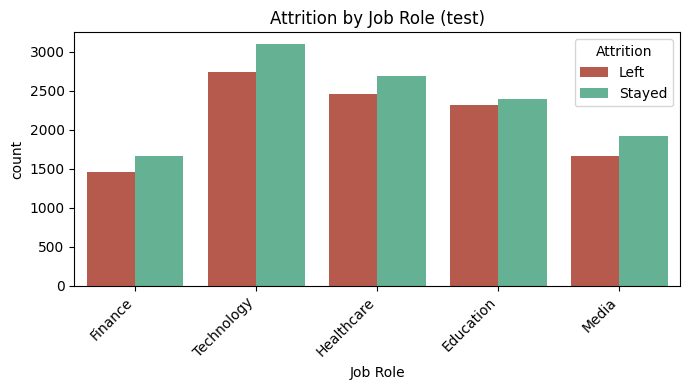

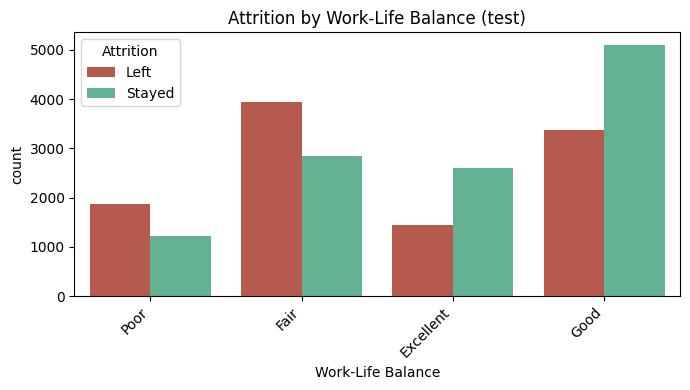

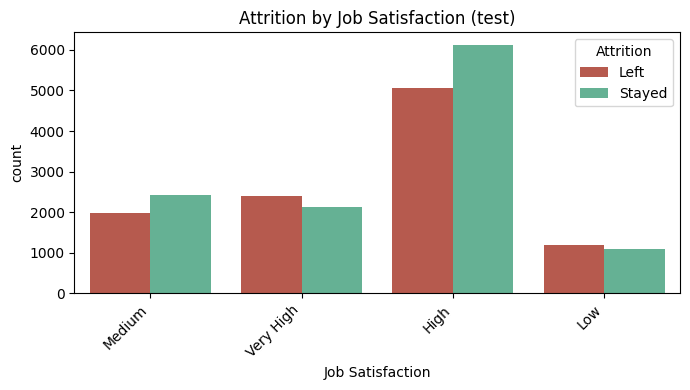

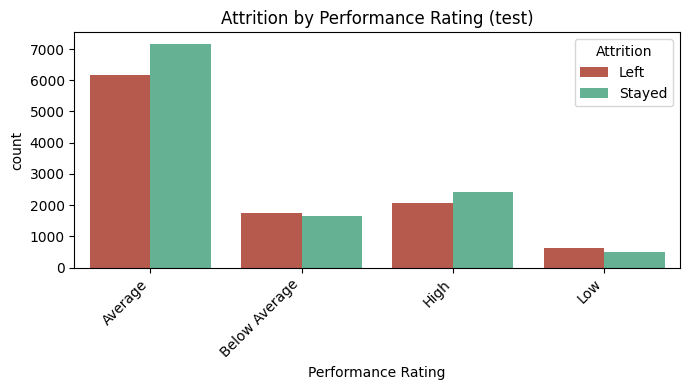

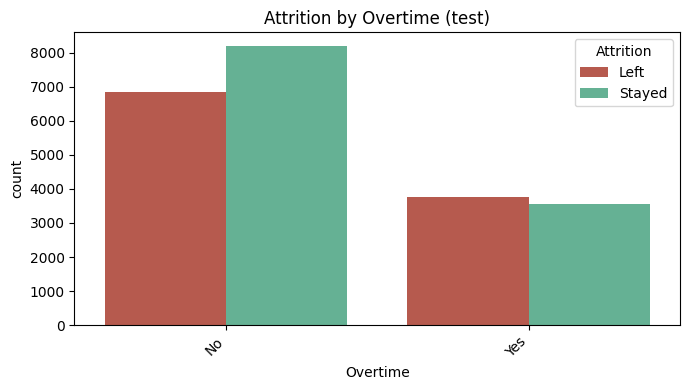

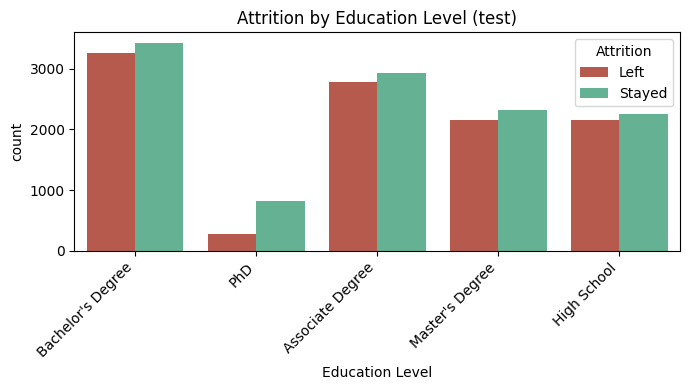

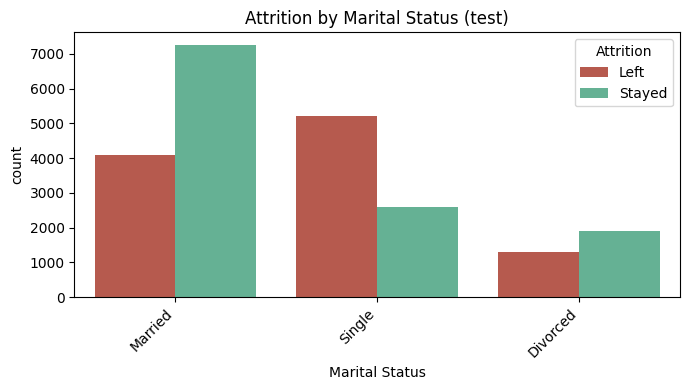

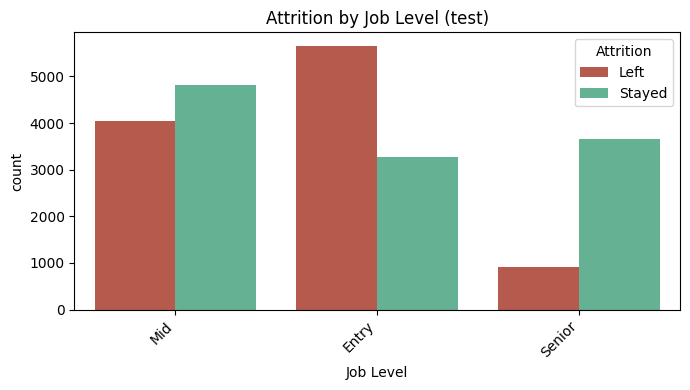

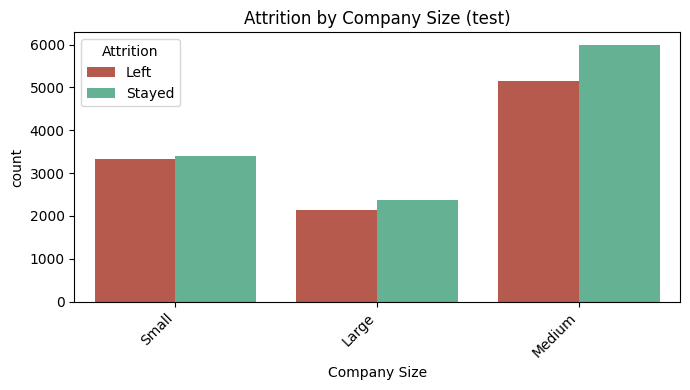

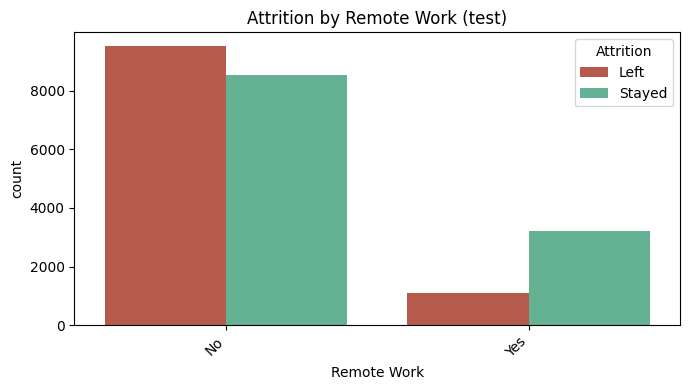

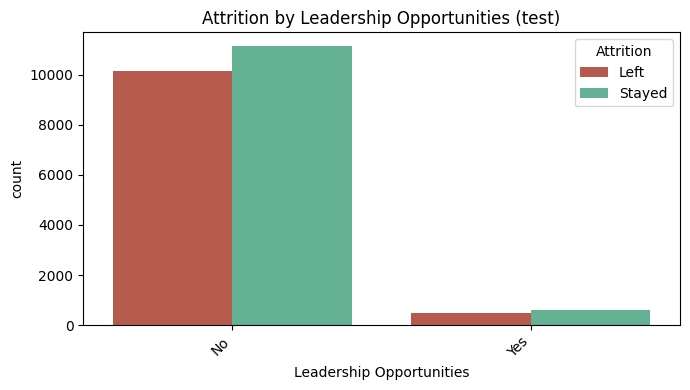

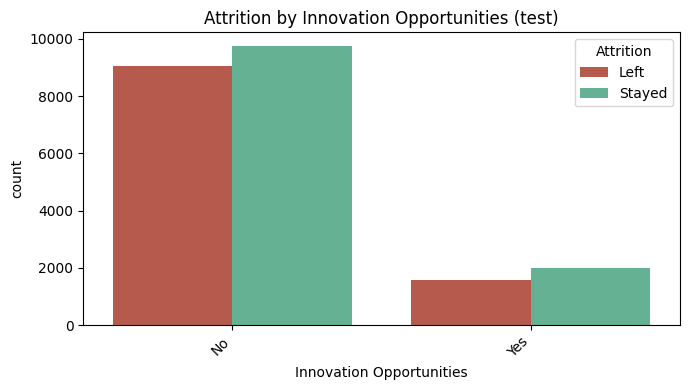

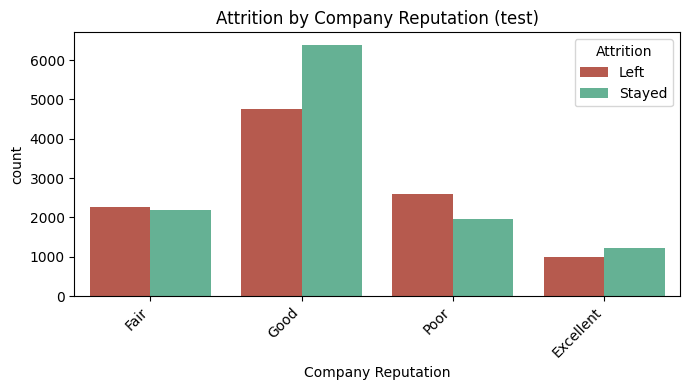

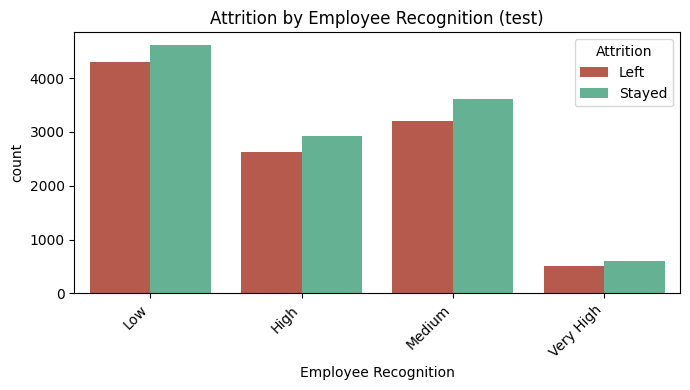

In [29]:
# Plot distribution for each categorical column with target variable
cat_cols_test = X_test.select_dtypes(include=["object", "category"]).columns.tolist()
palette = {'Stayed': "#58BE97", 'Left': "#C74D3D"}

for c in cat_cols_test:
    plt.figure(figsize=(7,4))
    tmp = pd.concat([X_test[[c]].copy(), y_test.rename("Attrition")], axis=1)
    sns.countplot(data=tmp, x=c, hue="Attrition", palette=palette)
    plt.title(f"Attrition by {c} (test)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [30]:
# Check the categorical columns
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols

['Gender',
 'Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Overtime',
 'Education Level',
 'Marital Status',
 'Job Level',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition']

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [31]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummy = pd.get_dummies(X_train[cat_cols], drop_first=True).astype(int)
# Add the results to the master DataFrame
X_train = pd.concat([X_train, X_train_dummy], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [32]:
# Drop the original categorical columns and check the DataFrame
X_train.drop(columns=cat_cols, inplace=True, errors='ignore')
X_train.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
8969,48,21,8399,1,54.0,4,77.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
26773,44,26,10012,0,69.0,4,60.0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
8685,44,30,5591,0,17.0,3,99.0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
54624,49,24,8269,0,87.0,2,31.0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
68034,31,17,6260,0,88.0,2,50.0,1,0,0,...,0,1,0,1,0,1,0,0,1,0


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [33]:
# Create dummy variables using the 'get_dummies' for independent columns
X_test_dummy = pd.get_dummies(X_test[cat_cols], drop_first=True).astype(int)

# Add the results to the master DataFrame
X_test = pd.concat([X_test, X_test_dummy], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [34]:
# Drop categorical columns and check the DataFrame
X_test.drop(columns=cat_cols, inplace=True, errors='ignore')
X_test.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
8634,32,8,5057,0,33.0,3,82.000000,0,1,0,...,1,0,0,0,1,0,0,1,0,0
42776,46,7,10057,1,67.0,5,59.000000,1,0,0,...,1,1,0,0,0,1,0,0,0,0
9952,38,13,8233,2,33.0,0,19.000000,0,1,0,...,0,0,0,0,0,1,0,1,0,0
12225,51,16,12203,2,41.0,1,55.711899,0,0,0,...,1,1,0,1,0,1,0,1,0,0
70632,42,1,8976,0,56.0,1,53.000000,0,0,1,...,1,0,0,0,0,0,1,0,0,0


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [35]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame({'Attrition':y_train})
y_test = pd.DataFrame({'Attrition':y_test})

In [36]:
y_test

,Attrition
8634,Left
42776,Stayed
9952,Left
12225,Left
70632,Left
...,...
44089,Stayed
22195,Stayed
68412,Stayed
73229,Stayed


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [37]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train = pd.get_dummies(y_train).astype(int)
y_train.head()

,Attrition_Left,Attrition_Stayed
8969,0,1
26773,0,1
8685,1,0
54624,1,0
68034,0,1


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [38]:
# Create dummy variables using the 'get_dummies' for dependent column
y_test = pd.get_dummies(y_test).astype(int)
y_test.head()

,Attrition_Left,Attrition_Stayed
8634,1,0
42776,0,1
9952,1,0
12225,1,0
70632,1,0


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [39]:
# Drop redundant columns from both train and validation
y_train.drop(columns='Attrition_Left', inplace=True, errors='ignore')
y_test.drop(columns='Attrition_Left', inplace=True, errors='ignore')

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [40]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [41]:
# Scale the numeric features present in the training set
X_train_scaled = X_train.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train_scaled[num_cols])
display(X_train_scaled.head())

# Scale the numerical features present in the validation set
X_test_scaled = X_test.copy()
X_test_scaled[num_cols] = scaler.transform(X_test_scaled[num_cols])
display(X_test_scaled.head())

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
8969,0.731707,0.40,0.146976,0.25,0.540816,0.266667,0.595238,0,0,0,...,0,0,0,0,0,0,1,0,1,0
26773,0.634146,0.50,0.180026,0.00,0.693878,0.266667,0.460317,1,0,0,...,0,0,0,0,1,0,0,0,1,0
8685,0.634146,0.58,0.089439,0.00,0.163265,0.200000,0.769841,1,0,0,...,1,0,0,0,0,0,1,1,0,0
54624,0.756098,0.46,0.144312,0.00,0.877551,0.133333,0.230159,0,1,0,...,1,0,1,0,0,0,1,1,0,0
68034,0.317073,0.32,0.103147,0.00,0.887755,0.133333,0.380952,1,0,0,...,0,1,0,1,0,1,0,0,1,0


,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Gender_Male,Job Role_Finance,Job Role_Healthcare,...,Company Size_Small,Remote Work_Yes,Leadership Opportunities_Yes,Innovation Opportunities_Yes,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
8634,0.341463,0.14,0.078498,0.00,0.326531,0.200000,0.634921,0,1,0,...,1,0,0,0,1,0,0,1,0,0
42776,0.682927,0.12,0.180948,0.25,0.673469,0.333333,0.452381,1,0,0,...,1,1,0,0,0,1,0,0,0,0
9952,0.487805,0.24,0.143574,0.50,0.326531,0.000000,0.134921,0,1,0,...,0,0,0,0,0,1,0,1,0,0
12225,0.804878,0.30,0.224920,0.50,0.408163,0.066667,0.426285,0,0,0,...,1,1,0,1,0,1,0,1,0,0
70632,0.585366,0.00,0.158798,0.00,0.561224,0.066667,0.404762,0,0,1,...,1,0,0,0,0,0,1,0,0,0


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [42]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()


7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [43]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE

rfe = RFE(estimator=log_reg, n_features_to_select=15)
rfe.fit(X_train_scaled, y_train)

,estimator,LogisticRegression()
,n_features_to_select,15
,step,1
,verbose,0
,importance_getter,'auto'
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1


In [44]:
# Display the features selected by RFE
X_train_scaled.columns[rfe.support_]

Index(['Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Poor', 'Performance Rating_Low',
       'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [45]:
# Put columns selected by RFE into variable 'col'
col = X_train_scaled.columns[rfe.support_]

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [46]:
# Select only the columns selected by RFE
col

Index(['Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Gender_Male', 'Work-Life Balance_Fair',
       'Work-Life Balance_Poor', 'Performance Rating_Low',
       'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')

In [47]:
# View the training data
X_train_scaled[col]

,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
8969,0.40,0.25,0.540816,0.266667,0,0,0,0,0,0,1,0,0,0,1
26773,0.50,0.00,0.693878,0.266667,1,0,0,0,0,1,1,0,0,1,0
8685,0.58,0.00,0.163265,0.200000,1,0,0,0,0,1,0,1,0,0,1
54624,0.46,0.00,0.877551,0.133333,0,0,0,0,0,0,0,0,0,0,1
68034,0.32,0.00,0.887755,0.133333,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71565,0.18,0.00,0.765306,0.266667,1,0,1,1,0,1,1,0,0,0,0
18946,0.18,0.50,0.581633,0.200000,0,1,0,0,0,1,1,0,0,0,0
4493,0.08,0.50,0.857143,0.333333,0,1,0,0,0,0,1,0,0,0,0
4406,0.44,0.00,0.928571,0.066667,1,0,0,0,0,0,0,0,1,0,0


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [48]:
# Import statsmodels and add constant to training set

import statsmodels.api as sm

X_train_const = sm.add_constant(X_train_scaled[col])
X_train_const.head()

,const,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
8969,1.0,0.40,0.25,0.540816,0.266667,0,0,0,0,0,0,1,0,0,0,1
26773,1.0,0.50,0.00,0.693878,0.266667,1,0,0,0,0,1,1,0,0,1,0
8685,1.0,0.58,0.00,0.163265,0.200000,1,0,0,0,0,1,0,1,0,0,1
54624,1.0,0.46,0.00,0.877551,0.133333,0,0,0,0,0,0,0,0,0,0,1
68034,1.0,0.32,0.00,0.887755,0.133333,1,0,0,0,0,0,0,1,1,0,0


7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [49]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
log_reg.fit(X_train_const, y_train)

print("Classes:", log_reg.classes_)
print("Intercept (bias):", log_reg.intercept_)
print("Coefficients:", log_reg.coef_)


Classes: [0 1]
Intercept (bias): [-0.13916976]
Coefficients: [[-0.13794268  0.84876007  0.93644315 -0.92050236  2.05285421  0.6013127
  -1.10219533 -1.2960395  -0.52983572  1.56050701 -1.7259928   0.96836342
   2.56338212  1.77234872 -0.53245514 -0.75101782]]


**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [50]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Make a VIF DataFrame for all the variables present
X_vif = X_train_const.drop(columns='const')

def make_vif_df(X):
    vif_values = []
    for i in range(X.shape[1]):
        vif = variance_inflation_factor(X.values, i)
        vif_values.append(vif)
    
    return (pd.DataFrame({
                "feature": X.columns,
                "VIF": vif_values
            })
            .sort_values("VIF", ascending=False)
            .reset_index(drop=True))

make_vif_df(X_vif)

,feature,VIF
0,Distance from Home,3.042549
1,Years at Company,2.355776
2,Gender_Male,2.010392
3,Number of Dependents,1.919104
4,Job Level_Mid,1.804307
5,Number of Promotions,1.605235
6,Marital Status_Single,1.470272
7,Work-Life Balance_Fair,1.461300
8,Job Level_Senior,1.401425
9,Company Reputation_Poor,1.293521


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [52]:
# Predict the probabilities on the training set
y_train_proba = log_reg.predict_proba(X_train_const)

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [53]:
# Reshape it into an array
y_train_proba = np.array(y_train_proba)
y_train_proba

array([[0.36274887, 0.63725113],
       [0.65312235, 0.34687765],
       [0.23809768, 0.76190232],
       ...,
       [0.49488499, 0.50511501],
       [0.14778149, 0.85221851],
       [0.41822447, 0.58177553]], shape=(52227, 2))

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [54]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
y_train_pred_df = pd.concat([
    y_train, 
    pd.DataFrame({'Stayed_Proba':y_train_proba[:, 1]}, index=y_train.index)
    ], axis=1)
y_train_pred_df

,Attrition_Stayed,Stayed_Proba
8969,1,0.637251
26773,1,0.346878
8685,0,0.761902
54624,0,0.236534
68034,1,0.987728
...,...,...
71565,0,0.094186
18946,0,0.162361
4493,0,0.505115
4406,1,0.852219


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [55]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
y_train_pred_df['Prediction'] = (y_train_pred_df['Stayed_Proba'] > 0.5).astype(int)
y_train_pred_df

,Attrition_Stayed,Stayed_Proba,Prediction
8969,1,0.637251,1
26773,1,0.346878,0
8685,0,0.761902,1
54624,0,0.236534,0
68034,1,0.987728,1
...,...,...,...
71565,0,0.094186,0
18946,0,0.162361,0
4493,0,0.505115,1
4406,1,0.852219,1


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [56]:
# Import metrics from sklearn for evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

# Check the overall accuracy

accuracy = accuracy_score(y_train_pred_df['Attrition_Stayed'], y_train_pred_df['Prediction'])
# y_train_true = y_train_pred_df['Attrition_Stayed']
accuracy

0.7457062438968349

7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [57]:
# Create confusion matrix

confusion_matrix(y_train_pred_df['Attrition_Stayed'], y_train_pred_df['Prediction'])

array([[18037,  6756],
       [ 6525, 20909]])

In [58]:
print(classification_report(y_train_pred_df['Attrition_Stayed'], y_train_pred_df['Prediction']))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73     24793
           1       0.76      0.76      0.76     27434

    accuracy                           0.75     52227
   macro avg       0.75      0.74      0.74     52227
weighted avg       0.75      0.75      0.75     52227



7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [59]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = confusion_matrix(y_train_pred_df['Attrition_Stayed'], y_train_pred_df['Prediction']).ravel().tolist()

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [60]:
# Calculate sensitivity
tp / (tp + fn)

0.7621564482029598

In [61]:
# Calculate specificity
tn / (tn + fp)

0.727503730891784

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [62]:
# Calculate precision
tp / (tp + fp)

0.7557925176215434

In [63]:
# Calculate recall
tp / (tp + fn)

0.7621564482029598

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [64]:
# Define ROC function
fpr, tpr, thresholds = roc_curve(y_train_pred_df['Attrition_Stayed'], y_train_pred_df['Stayed_Proba'])

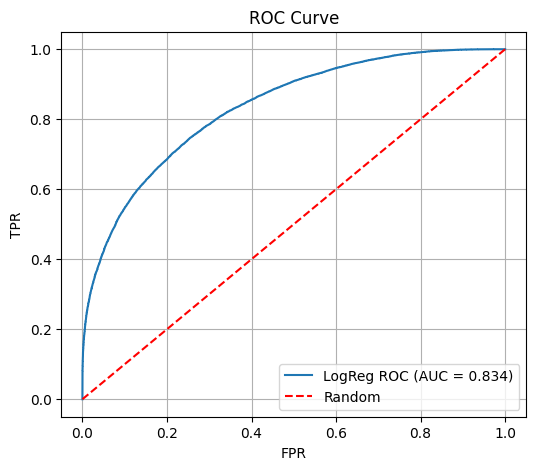

In [65]:
# Call the ROC function
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"LogReg ROC (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "r--", label="Random")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [66]:

J = tpr - fpr  # since J = TPR + (1 - FPR) - 1 = TPR - FPR
best_idx = np.argmax(J)
best_threshold = thresholds[best_idx]
best_threshold

np.float64(0.5203083059338383)

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [67]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
cutoffs = np.round(np.linspace(0.05, 0.95, 19), 2)

df = pd.DataFrame({'y_true': y_train_pred_df['Attrition_Stayed'], 'y_proba': y_train_pred_df['Stayed_Proba']})
for c in cutoffs:
    df[f'pred_c{c:.2f}'] = (df['y_proba'] >= c).astype(int)

df

,y_true,y_proba,pred_c0.05,pred_c0.10,pred_c0.15,pred_c0.20,pred_c0.25,pred_c0.30,pred_c0.35,pred_c0.40,...,pred_c0.50,pred_c0.55,pred_c0.60,pred_c0.65,pred_c0.70,pred_c0.75,pred_c0.80,pred_c0.85,pred_c0.90,pred_c0.95
8969,1,0.637251,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
26773,1,0.346878,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8685,0,0.761902,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
54624,0,0.236534,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68034,1,0.987728,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71565,0,0.094186,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18946,0,0.162361,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4493,0,0.505115,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
4406,1,0.852219,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [68]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
rows = []
for c in cutoffs:
    y_pred = df[f'pred_c{c:.2f}']
    acc = accuracy_score(df['y_true'], y_pred)
    prec = precision_score(df['y_true'], y_pred, zero_division=0)
    sensitivity = recall_score(df['y_true'], y_pred, zero_division=0)
    f1 = f1_score(df['y_true'], y_pred, zero_division=0)
    tn, fp, fn, tp = confusion_matrix(df['y_true'], y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan

    rows.append({
        'cutoff': c,
        'accuracy': acc,
        'precision': prec,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'f1': f1,
        'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn
    })

metrics_df = pd.DataFrame(rows).sort_values('cutoff').reset_index(drop=True)

roc_auc = roc_auc_score(df['y_true'], df['y_proba'])
fpr, tpr, thresholds = roc_curve(df['y_true'], df['y_proba'])
metrics_df


,cutoff,accuracy,precision,sensitivity,specificity,f1,tp,fp,tn,fn
0,0.05,0.552664,0.540081,0.999781,0.057920,0.701313,27428,23357,1436,6
1,0.10,0.600226,0.568200,0.995334,0.163030,0.723424,27306,20751,4042,128
2,0.15,0.639420,0.594928,0.982540,0.259751,0.741112,26955,18353,6440,479
3,0.20,0.670037,0.619828,0.961690,0.347316,0.753811,26383,16182,8611,1051
4,0.25,0.693339,0.642582,0.937851,0.422781,0.762634,25729,14311,10482,1705
5,0.30,0.713864,0.666711,0.910367,0.496430,0.769717,24975,12485,12308,2459
6,0.35,0.727727,0.689226,0.877196,0.562336,0.771933,24065,10851,13942,3369
7,0.40,0.737664,0.711296,0.842568,0.621587,0.771387,23115,9382,15411,4319
8,0.45,0.744653,0.734888,0.803893,0.679103,0.767843,22054,7956,16837,5380
9,0.50,0.745706,0.755793,0.762156,0.727504,0.758961,20909,6756,18037,6525


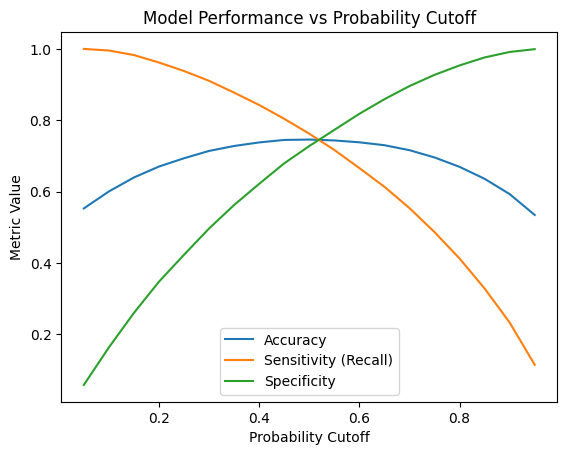

In [69]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
plt.figure()
plt.plot(metrics_df['cutoff'], metrics_df['accuracy'], label='Accuracy')
plt.plot(metrics_df['cutoff'], metrics_df['sensitivity'], label='Sensitivity (Recall)')
plt.plot(metrics_df['cutoff'], metrics_df['specificity'], label='Specificity')
plt.xlabel('Probability Cutoff')
plt.ylabel('Metric Value')
plt.title('Model Performance vs Probability Cutoff')
plt.legend()
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [70]:
# Create a column for final prediction based on the optimal cutoff
final_cutoff = 0.5

y_train_pred_final = y_train_pred_df.copy()
y_train_pred_final['Prediction'] = (y_train_pred_df['Stayed_Proba'] > final_cutoff).astype(int)
y_train_pred_final.head()

,Attrition_Stayed,Stayed_Proba,Prediction
8969,1,0.637251,1
26773,1,0.346878,0
8685,0,0.761902,1
54624,0,0.236534,0
68034,1,0.987728,1


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [71]:
# Calculate the accuracy
accuracy = accuracy_score(y_train_pred_final['Attrition_Stayed'], y_train_pred_final['Prediction'])
accuracy

0.7457062438968349

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [72]:
# Create the confusion matrix once again
confusion_matrix(y_train_pred_final['Attrition_Stayed'], y_train_pred_final['Prediction'])

array([[18037,  6756],
       [ 6525, 20909]])

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [73]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = confusion_matrix(y_train_pred_final['Attrition_Stayed'], y_train_pred_final['Prediction']).ravel().tolist()

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [74]:
# Calculate Sensitivity
tp / (tp + fn)

0.7621564482029598

In [75]:
# Calculate Specificity
tn / (tn + fp)

0.727503730891784

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [76]:
# Calculate Precision
tp / (tp + fp)

0.7557925176215434

In [77]:
# Calculate Recall
tp / (tp + fn)

0.7621564482029598

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [78]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [79]:
# Check actual and predicted values from initial model
y_train_pred_final

,Attrition_Stayed,Stayed_Proba,Prediction
8969,1,0.637251,1
26773,1,0.346878,0
8685,0,0.761902,1
54624,0,0.236534,0
68034,1,0.987728,1
...,...,...,...
71565,0,0.094186,0
18946,0,0.162361,0
4493,0,0.505115,1
4406,1,0.852219,1


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

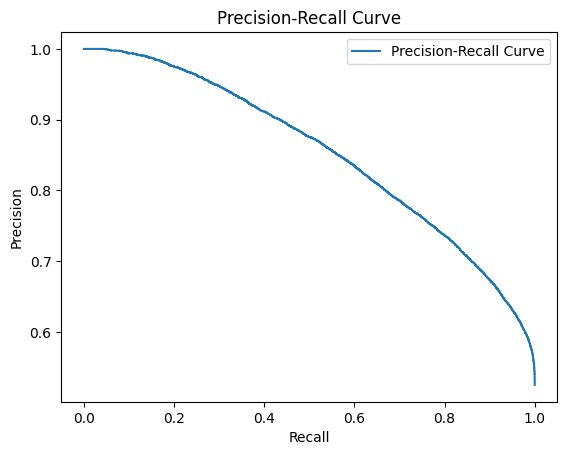

In [80]:
# Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_train_pred_final['Attrition_Stayed'], y_train_pred_df['Stayed_Proba'])
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [81]:
# Select the relevant features for validation set
X_validation = X_test_scaled[col]
X_validation.head()

,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
8634,0.14,0.00,0.326531,0.200000,0,0,1,0,0,0,1,0,0,1,0
42776,0.12,0.25,0.673469,0.333333,1,1,0,0,1,1,0,0,1,0,0
9952,0.24,0.50,0.326531,0.000000,0,0,0,0,0,1,1,0,0,0,0
12225,0.30,0.50,0.408163,0.066667,0,1,0,0,0,0,0,0,1,0,0
70632,0.00,0.00,0.561224,0.066667,0,0,0,0,0,0,0,1,0,0,1


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [82]:
# Add constant to X_validation
X_validation = sm.add_constant(X_validation)
X_validation.head()

,const,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Poor,Performance Rating_Low,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Remote Work_Yes,Company Reputation_Fair,Company Reputation_Poor
8634,1.0,0.14,0.00,0.326531,0.200000,0,0,1,0,0,0,1,0,0,1,0
42776,1.0,0.12,0.25,0.673469,0.333333,1,1,0,0,1,1,0,0,1,0,0
9952,1.0,0.24,0.50,0.326531,0.000000,0,0,0,0,0,1,1,0,0,0,0
12225,1.0,0.30,0.50,0.408163,0.066667,0,1,0,0,0,0,0,0,1,0,0
70632,1.0,0.00,0.00,0.561224,0.066667,0,0,0,0,0,0,0,1,0,0,1


8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [83]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = log_reg.predict_proba(X_validation)
# View predictions
y_validation_pred

array([[0.71267645, 0.28732355],
       [0.2263242 , 0.7736758 ],
       [0.6600215 , 0.3399785 ],
       ...,
       [0.20966694, 0.79033306],
       [0.13403631, 0.86596369],
       [0.27610387, 0.72389613]], shape=(22383, 2))

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [84]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame({'Stayed_Proba':y_validation_pred[:, 1]})
predicted_probability
# Convert 'y_validation' to DataFrame 'actual'

actual = y_test.copy().reset_index(drop=True)
actual
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side

y_validation_pred_final = pd.concat([actual, predicted_probability], axis=1)
y_validation_pred_final

,Attrition_Stayed,Stayed_Proba
0,0,0.287324
1,1,0.773676
2,0,0.339979
3,0,0.706207
4,0,0.760514
...,...,...
22378,1,0.392487
22379,1,0.980057
22380,1,0.790333
22381,1,0.865964


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [85]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_validation_pred_final['Prediction'] = (y_validation_pred_final['Stayed_Proba'] > final_cutoff).astype(int)

# Check the DataFrame
y_validation_pred_final

,Attrition_Stayed,Stayed_Proba,Prediction
0,0,0.287324,0
1,1,0.773676,1
2,0,0.339979,0
3,0,0.706207,1
4,0,0.760514,1
...,...,...,...
22378,1,0.392487,0
22379,1,0.980057,1
22380,1,0.790333,1
22381,1,0.865964,1


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [86]:
# Calculate the overall accuracy
accuracy = accuracy_score(y_validation_pred_final['Attrition_Stayed'], y_validation_pred_final['Prediction'])
accuracy

0.7473529017557968

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [87]:
# Create confusion matrix
confusion_matrix(y_validation_pred_final['Attrition_Stayed'], y_validation_pred_final['Prediction'])

array([[7754, 2872],
       [2783, 8974]])

In [88]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = confusion_matrix(y_validation_pred_final['Attrition_Stayed'], y_validation_pred_final['Prediction']).ravel().tolist()

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [89]:
# Calculate sensitivity
tp / (tp + fn)

0.7632899549204729

In [90]:
# Calculate specificity
tn / (tn + fp)

0.7297195558065124

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [91]:
# Calculate precision
tp / (tp + fp)

0.7575552929258822

In [92]:
# Calculate recall
tp / (tp + fn)

0.7632899549204729

## Conclusion



This study developed a logistic regression model to predict employee retention and evaluated its effectiveness using multiple performance metrics derived from the validation dataset. The final model achieved an overall accuracy of approximately 74.7%, indicating a reasonably strong ability to correctly classify employees who stayed versus those who left. 

The optimized probability cutoff resulted in a sensitivity (recall) of approximately 76.3%, meaning the model successfully identified a substantial proportion of employees who stayed with the organization. The specificity of around 73.0% indicates that the model also performed well in correctly identifying employees who were likely to leave. Furthermore, the precision of approximately 75.8% suggests that the majority of employees predicted to stay indeed remained with the company, reinforcing the reliability of the model’s positive predictions.

Overall, these findings demonstrate that logistic regression can effectively capture key patterns related to employee retention while maintaining interpretability. The balanced performance across accuracy, sensitivity, specificity, precision, and recall supports the model’s suitability as a decision-support tool for the business.